参考
- [様々な確率分布(Udemy)](https://www.udemy.com/course/pythonstan/learn/lecture/9132032#overview)
- [[Python]scipy statsの使い方](https://qiita.com/supersaiakujin/items/71540d1ecd60ced65add)

# 様々な確率分布

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## ベルヌーイ分布
式: $Bernoulli(x|\theta) = \theta^x(1-\theta)^{1-x}$  
性質: $E[x] = \theta$, $V[x] = \theta(1-\theta)$  
使用例: コイン投げなど、2者択一の問題

<AxesSubplot:title={'center':'bernoulli'}>

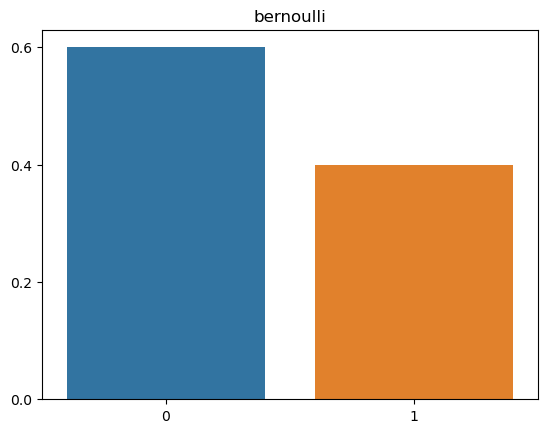

In [23]:
from scipy.stats import bernoulli
# グラフの設定
plt.yticks(np.arange(0, 1.1, 0.2))
plt.title('bernoulli')

p = 0.4
prob_dist = bernoulli.pmf([0, 1], p) # p = 0.4 で 1 となり、 1-p = 0.6 で 0 となる
sns.barplot(x=[0, 1], y=prob_dist)

## 二項分布
ベルヌーイ分布を複数回やった場合、二項分布となる。  
逆に言えば、二項分布の N=1 の特別なケースが二項分布と言える。  
式: 
$$
Binominal(x|N, \theta) = \frac{N!}{x!(N-x)!}\theta^x(1-\theta)^{N-x}
$$
性質: $E[X] = N\theta$, $V[X] = N\theta(1-\theta)$  
使用例: N 回コイン投げをした時の表の数

Text(0, 0.5, 'probability')

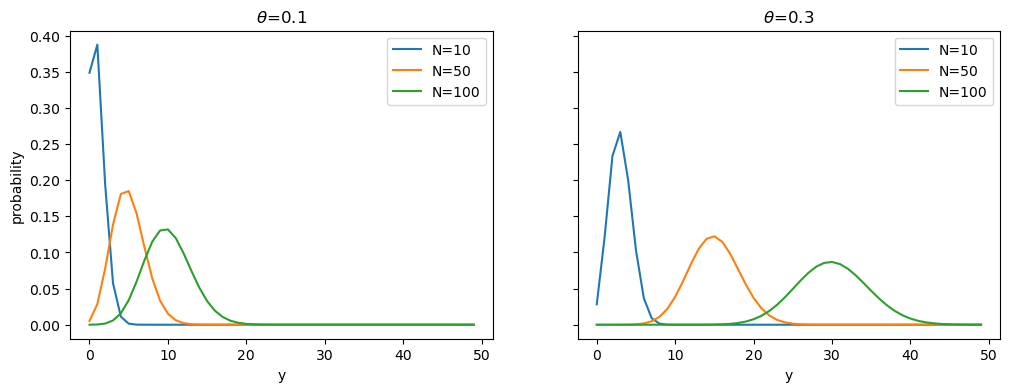

In [26]:
from scipy.stats import binom
ys = np.arange(0, 50, 1)
ns = [10, 50, 100]
thetas = [0.1, 0.3]

fig = plt.figure(figsize=(12, 4))
ax = fig.subplots(1, 2, sharex=True, sharey=True)
for i, theta in enumerate(thetas):
    for j, n in enumerate(ns):
        # 確率質量関数を計算
        pmf = binom.pmf(ys, n, p=theta)
        # Plot
        ax[i].plot(ys, pmf, label='N={}'.format(n))
    ax[i].legend()
    ax[i].set_xlabel('y')
    ax[i].set_title('$\\theta$={}'.format(theta))
ax[0].set_ylabel('probability')

## 一様分布
a ~ b までの間の値を一様な確率で分布する
式: 
$$
Uniform(x|a,b) = \frac{1}{b-a}
$$
性質: $E[X]=\frac{b+a}{2}$, $V[X]=\frac{(b-a)^2}{12}$  
使用例: 事前分布や確率変数に特徴がない場合に、とりあえずこの一様分布を利用する場合がある

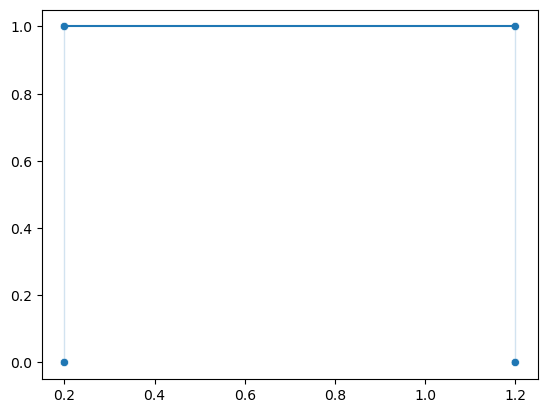

In [66]:
a = 0.2
b = 1.2
df = pd.DataFrame([0,1,1,0],[a,a,b,b])

sns.scatterplot(data=df, legend=False)
sns.lineplot(data=pd.DataFrame([0,1],[a,a]), legend=False)
sns.lineplot(data=pd.DataFrame([1,1],[a,b]), legend=False)
sns.lineplot(data=pd.DataFrame([1,0],[b,b]), legend=False)
# x軸とy軸の最大値を設定
plt.xlim=(0, 1.4)
plt.ylim=(0, 1.2)

plt.show()